 this tutorial, you will learn to:

implement Linear Regression for prediction using Numpy in detail.
Visualize how the algorithm learns epoch by epoch.
In addition to this, you will explore two layer Neural Networks.

In [2]:
# Numpy for efficient Matrix and mathematical operations.
import numpy as np

# Pandas for table and other related operations
import pandas as pd

# Matplotlib for visualizing graphs
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

# Sklearn for creating a dataset
from sklearn.datasets import make_regression

# train_test_split for splitting the data into training and testing data
from sklearn.model_selection import train_test_split

%matplotlib inline

# Set parameters for plotting
params = {'axes.titlesize': 'xx-large',               # Set title size
          'axes.labelsize': 'x-large',                # Set label size
          'figure.figsize': (8, 6)                    # Set a figure Size
}

rcParams.update(params)

You'll use the sklearn dataset generator for creating the dataset. You shall also the sklearn package for splitting the data into training and test data. If you are not aware of sklearn, it is a rich package with many machine learning algorithms. Although, you get prebuilt functions for performing linear regression, you are going to build it from scratch.

For creating the dataset, you must first set a list of hyperparameters 
− while m and b are parameters, the number of samples, the number of input features, the number of neurons, the learning rate, the number of iterations/epochs for training etc. are called hyperparameters. You shall learn about these hyperparameters as you implement the algorithm.

For now, you shall set the number of training samples, the number of input features, the learning rate and epochs.You shall understand learning rate and epochs in a short while.

In [4]:
# Sample size
M = 200

# No. of input features
n = 1

# Learning Rate - Define during explanation
l_r = 0.05

# Number of iterations for updates - Define during explanation
epochs = 51

Your first task would be to import or generate the data. In this tutorial, you'll generate the dataset using sklearn's make_regression function.

For purpose of learning, we shall keep the number of features minimal so that it is easy to visualize. Hence, you must choose only one feature.

In [5]:
X, y = make_regression(n_samples=M, n_features=n, n_informative=n,
                       n_targets=1, random_state=42, noise=10)

Now, it's time to visualize what the data generator has cooked up!

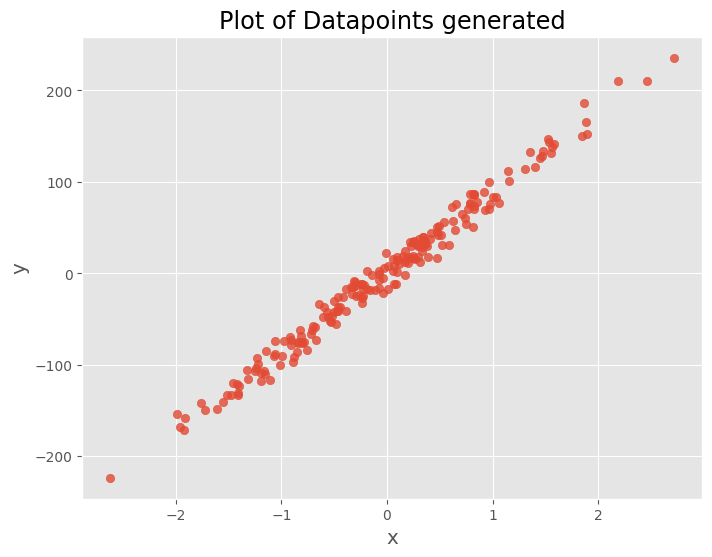

In [7]:
def plot_graph(X, y):
    
    # Plot the original set of datapoints
    _ = plt.scatter(X, y, alpha=0.8)
    
    _ = plt.title('Plot of Datapoints generated')
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

    plt.show()

plot_graph(X,y)

In [8]:
print('Shape of vector X:', X.shape)
print('Shape of vector y:', y.shape)

Shape of vector X: (200, 1)
Shape of vector y: (200,)


In [9]:
# Function to reset the sizes 
def reset_sizes(*args):
     
    return tuple(arg.reshape((arg.shape[0], 1)) for arg in args)
# Reset the size from (200,) -> (200, 1)
X, y = reset_sizes(X, y)
X.shape

(200, 1)

Next you will have to split the dataset into train and test sets, so that you can test the accuracy of the regression model using a part of the dataset once you have trained the model.

Now let's split the data into train set and test set. You shall also reset the sizes so there is no discrepency in doing matrix computations

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


The next step is to randomly generate a line with a random slope and an intercept(bias). The goal is to achieve the best fit for the line.

In [13]:
# Function to generate parameters of the linear regression model, m & b.
def init_params():  
    m = np.random.normal(scale=10)
    b = np.random.normal(scale=10)
    
    return m, b

# Call function to generate paramets
m, b = init_params()
print(f"m = {m:.2f}")
print(f"b = {b:.2f}")

m = -0.13
b = 6.02


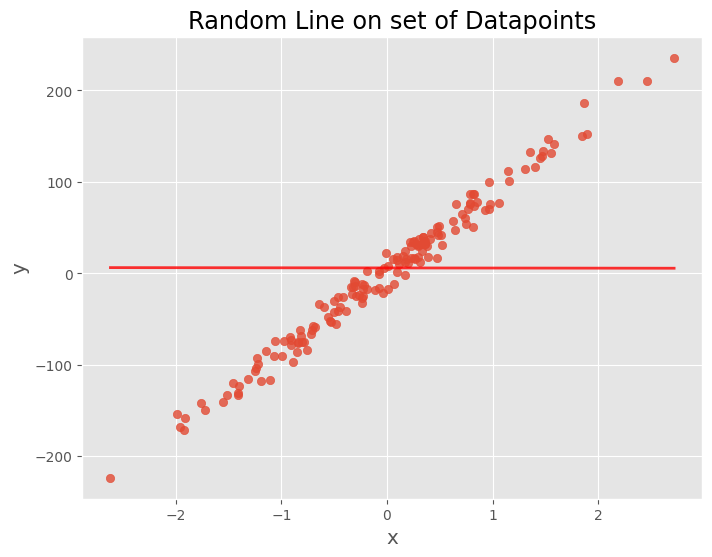

In [16]:
def plot_graph(dataset, pred_line=None):
    
    X, y = dataset['x'], dataset['y']
    
    # Plot the set of datapoints
    _ = plt.scatter(X, y, alpha=0.8)
    
    if(pred_line != None):
        
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        
        _ = plt.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        
        _ = plt.title('Random Line on set of Datapoints')
    
    else:
        _ = plt.title('Plot of Datapoints')
   
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

    plt.show()
    
def plot_pred_line(X, y, m, b):
    x_line = np.linspace(np.min(X), np.max(X), 10)
    
    y_line = m * x_line + b
    
    dataset = {'x': X, 'y': y}
    
    pred_line = {'x_line' : x_line, 'y_line' : y_line}
    
    plot_graph(dataset, pred_line)
    
    return

plot_pred_line(X_train, y_train, m, b)

 you'll calculate the Cost/Error/Loss Function

In [17]:
def forward_prop(X, m, b):
    
    y_pred = m * X + b
    
    return y_pred

y_pred = forward_prop(X_train, m, b)

In [18]:
def compute_loss(y, y_pred):
    loss = 1 / 2 * np.mean((y_pred - y)**2)
    
    return loss

In [19]:
losses = []

compute_loss(y_train, y_pred)

np.float64(3393.6155585052693)

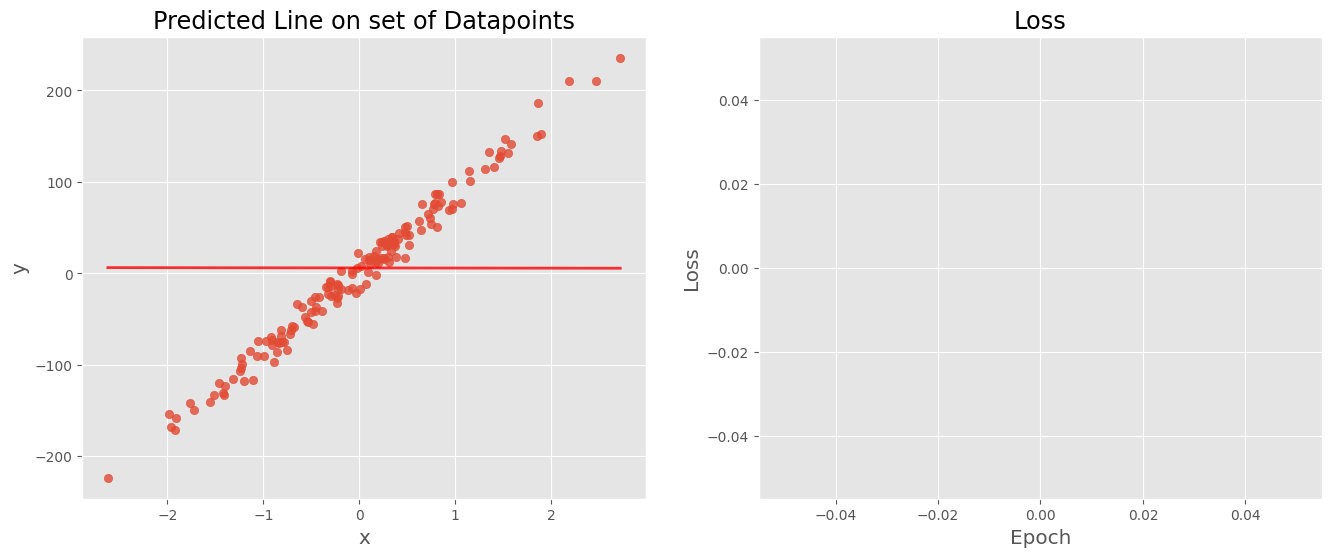

In [21]:
def plot_graph(dataset, pred_line=None, losses=None):
    
    plots = 2 if losses!=None else 1
    
    fig = plt.figure(figsize=(8 * plots, 6))
    
    
    X, y = dataset['X'], dataset['y']
    
    ax1 = fig.add_subplot(1, plots, 1)
    ax1.scatter(X, y, alpha=0.8)                                # Plot the original set of datapoints
    
    if(pred_line != None):

        
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        
        ax1.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        
        ax1.set_title('Predicted Line on set of Datapoints')
    
    else:
        ax1.set_title('Plot of Datapoints generated')
   
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    if(losses!=None):
        ax2 = fig.add_subplot(1, plots, 2)
        ax2.plot(np.arange(len(losses)), losses, marker='o')
        
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')

    plt.show()
    
def plot_pred_line(X, y, m, b,losses=None):
    
    # Generate a set of datapoints on x for creating a line.
    # We shall consider the range of X_train for generating the line so that the line superposes the datapoints.
    x_line = np.linspace(np.min(X), np.max(X), 10)             
    
    # Calculate the corresponding y with the parameter values of m & b
    y_line = m * x_line + b                                                
    
    plot_graph(dataset={'X': X, 'y': y}, pred_line={'x_line': x_line, 'y_line':y_line}, losses=losses)
    
    return 

plot_pred_line(X_train, y_train, m, b,losses)

Gradient Descent for Linear Regression

In [23]:
def grad_desc(m, b, X_train, y_train, y_pred):
    dm = np.mean((y_pred - y_train) * X_train)
    db = np.mean(y_pred - y_train)
    
    return dm, db

def update_params(m, b, dm, db, l_r):
    
    m -= l_r * dm
    b -= l_r * db
    
    return m, b

Let us define a function back_prop, which calls both grad_desc and update_params.

In [24]:
def back_prop(X_train, y_train, y_pred, m, b, l_r):

    dm, db = grad_desc(m, b, X_train, y_train, y_pred)
    
    m, b = update_params(m, b, dm, db, l_r)

    return m, b

We shall again set and tune the parameters to improve the accuracy of our linear regression model.

In [ ]:
# Sample size
M = 200

# No. of input features
n = 1

# Learning Rate - Define during explanation
l_r = 0.05

# Number of iterations for updates - Define during explanation
epochs = 61

X, y = make_regression(n_samples=M, n_features=n, n_informative=n, 
                         n_targets=1, random_state=42, noise=10)

dataset = {'X': X, 'y': y}

plot_graph(dataset)

m, b = init_params()

X, y = reset_sizes(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

losses = []

for i in range(epochs):
    y_pred = forward_prop(X_train, m, b)

    loss = compute_loss(y_train, y_pred)
    losses.append(loss)

    m, b = back_prop(X_train, y_train, y_pred, m, b, l_r)

    if(i%10==0):
        print('Epoch: ', i)
        print('Loss = ', loss)
        plot_pred_line(X_train, y_train, m, b, losses)

del losses[:]